<a href="https://colab.research.google.com/github/seon0415/weit/blob/main/knolpy%20%EC%9E%90%EC%97%B0%EC%96%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 53.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.6/465.6 KB 33.5 MB/s eta 0:00:00


In [ ]:
pip install jpype1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import konlpy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
moon=open('speech_moon.txt', encoding='UTF-8').read()
moon

In [ ]:
#불필요한문자 제거, 공백으로 바꾸기, 명사추출하기
import re
moon=re.sub('^가-힣', ' ', moon)

hannanum=konlpy.tag.Hannanum()
nouns=hannanum.nouns(moon)
nouns

In [ ]:
#데이터프레임으로 만들고, 두글자 이상 단어만 남기고, 단어빈도표 만들기
df=pd.DataFrame({'word':nouns})
df['len']=df['word'].str.len()
df_word=df.query('len>=2')

df_word=df_word.groupby('word', as_index=False)\
                .agg(count=('word','count'))\
                .sort_values('count', ascending=False)
          

df_word                

In [ ]:
#단어빈도 막대그래프

top20=df_word.head(20)

sns.barplot(data=top20, x='count', y='word')

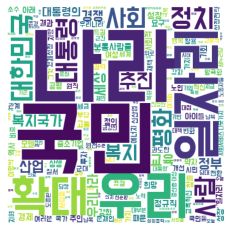

In [ ]:
#워드클라우드만들기 출력하기
font='DoHyeon-Regular.ttf'

wc=WordCloud(random_state=1234,    #난수 고정
             font_path=font,       #폰트 설정  
             width=400,            #가로크기
             height=400,           #세로크기   
             background_color='white')   #배경색

dic_word=df_word,set_index('word').to_dict()['count']
img_wordcloudmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  


dic_word=df_word.set_index('word').to_dict()['count']
img_wordcloud =wc.generate_from_frequencies(dic_word)  

plt.axis('off')
plt.imshow(img_wordcloud)

In [ ]:
#워드클라우드 모양 바꾸기
